In [2]:
import requests

url = "https://ghoapi.azureedge.net/api/HIV_0000000001"

response = requests.get(url)

data = response.json()

countries = []
years = []
rates = []

for item in data['value']:
    countries.append(item['SpatialDim'])
    years.append(item['TimeDim'])
    rates.append(item['NumericValue'])

item

{'Id': 29660064,
 'IndicatorCode': 'HIV_0000000001',
 'SpatialDimType': 'COUNTRY',
 'SpatialDim': 'ZWE',
 'TimeDimType': 'YEAR',
 'TimeDim': 2000,
 'Dim1Type': None,
 'Dim1': None,
 'Dim2Type': None,
 'Dim2': None,
 'Dim3Type': None,
 'Dim3': None,
 'DataSourceDimType': None,
 'DataSourceDim': None,
 'Value': '1 600 000 [1 500 000-1 700 000]',
 'NumericValue': 1600000.0,
 'Low': 1500000.0,
 'High': 1700000.0,
 'Comments': None,
 'Date': '2022-09-19T06:41:52.02+02:00',
 'TimeDimensionValue': '2000',
 'TimeDimensionBegin': '2000-01-01T00:00:00+01:00',
 'TimeDimensionEnd': '2000-12-31T00:00:00+01:00'}

In [4]:
import pandas as pd

data = {'Country':countries, 'Year':years, 'Rate': rates}

df = pd.DataFrame(data)

to_remove = ['GLOBAL','SEAR','AMR','EUR','EMR','AFR','WPR','PAHO']

initial_df = df[~df['Country'].isin(to_remove)]

initial_df.head()

,Country,Year,Rate
224,AFG,2021,11000.0
225,ALB,2021,1400.0
226,DZA,2021,21000.0
227,AND,2021,NaN
228,AGO,2021,320000.0


In [16]:
grouped_df = initial_df.groupby(['Year'])['Rate'].sum()

grouped_df.head()

Year
2000    23772960.0
2001    24352160.0
2002    24571260.0
2003    25032450.0
2004    25082750.0
Name: Rate, dtype: float64

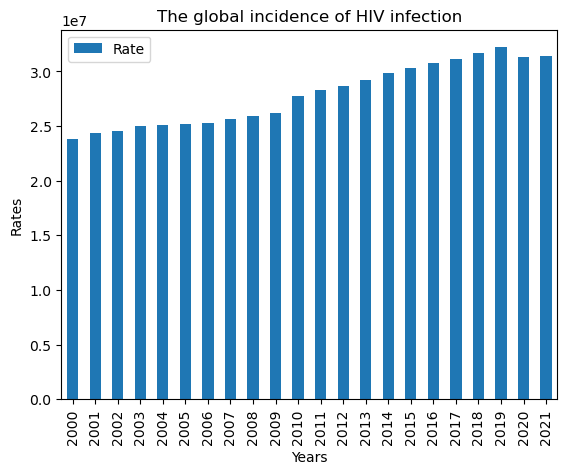

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

new_df = grouped_df.reset_index()

new_df.plot(kind='bar',x='Year',y='Rate')

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('The global incidence of HIV infection')
plt.show()

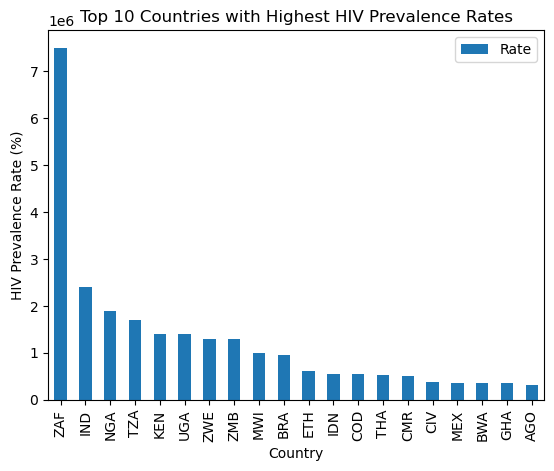

In [20]:
import datetime
today = datetime.date.today()
year = today.year-2
top_countries = 20

latest_year_df = initial_df[initial_df['Year'] == year]
grouped_df = latest_year_df.groupby('Country').sum().sort_values(by='Rate', ascending=False)
top_10 = grouped_df.nlargest(top_countries,'Rate').reset_index()

top_10.plot(kind='bar', x='Country', y='Rate')

plt.xlabel('Country')
plt.ylabel('HIV Prevalence Rate (%)')
plt.title('Top 10 Countries with Highest HIV Prevalence Rates')
plt.show()

In [21]:
import plotly.express as px

country_codes = px.data.gapminder().query("year == 2007")[["country", "iso_alpha"]]

merged_df = pd.merge(top_10, country_codes, left_on="Country", right_on="iso_alpha")

fig = px.choropleth(merged_df, locations="Country", color="Rate", hover_name="Country",
                    projection="natural earth")

fig.show()
